# UNB - PPGI
# Processamento de Imagem
## Trabalho 07

Henrique Brandão

___

Dada a seguinte imagem 

[warning-triangle.jpg] 

Use processamento de imagens para gerar uma imagem binária da forma geométrica predominante e processamento morfológico para transformar em um objeto sólido.  

Usando o método dos momentos invariantes descubra qual das imagens abaixo mais se encaixa na imagem binária resultante do seu processamento.   

[ imagens.png]  

Entrega é um documento em PDF em formato de relatório. Código só em sessão de anexo/apêndice. Não precisa enrolar nem colocar background, mas precisa discutir o que você está fazendo e discutir os resultados. 

# 1) Isolando a forma

In [1]:
import cv2

import numpy as np
import seaborn as sns

from math import sqrt
from random import choice

from PIL import Image
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
f = 'warning-triangle.jpg'
x = cv2.imread(f)
x = cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB)

[]

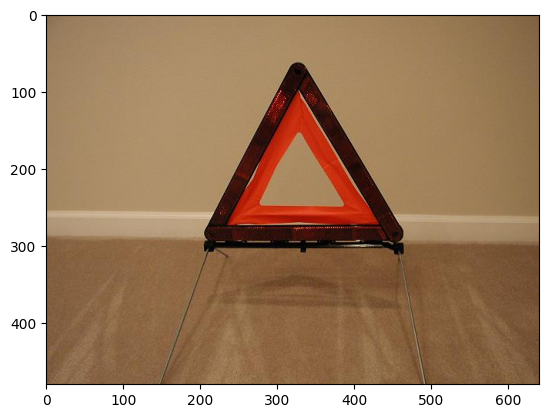

In [3]:
plt.imshow(x)
plt.plot()

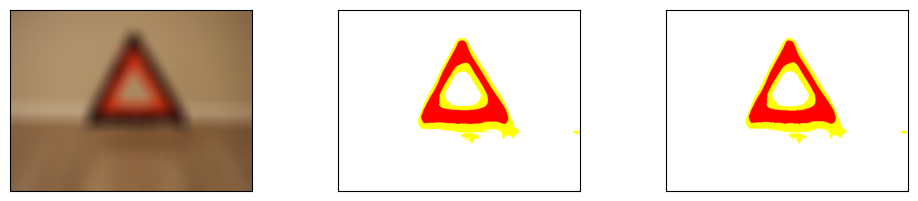

In [4]:
fbordas = np.array([
    [-1, 1, 1],
    [-1, 0, 1],
    [-1, 1, 1]])

tresh = lambda i: cv2.threshold(i, 50, 255, cv2.THRESH_BINARY)[-1]
conv = lambda i,f: cv2.filter2D(i, -1, f)

plt.figure(figsize=(12,8))

k = (45,45)

__ = (
    cv2.blur(x, ksize=k),
    tresh(cv2.blur(x, ksize=k)),
    conv(tresh(cv2.blur(x, ksize=k)), fbordas),
)

for i,_ in enumerate(__):
    plt.subplot(len(__),3,i+1)
    plt.imshow(_)
    plt.xticks([])
    plt.yticks([])

plt.show()

In [5]:
y = conv(tresh(cv2.blur(x, ksize=k)), fbordas)

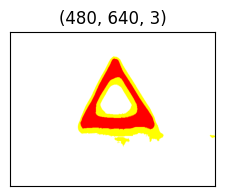

In [6]:
plt.figure(figsize=(3,2))

plt.imshow(y)
plt.title(y.shape)
plt.xticks([])
plt.yticks([])

plt.show()

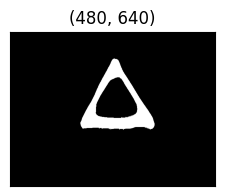

In [7]:
plt.figure(figsize=(3,2))

_ = y[:,:,1]

plt.imshow(_, cmap='Greys')
plt.title(_.shape)
plt.xticks([])
plt.yticks([])

plt.show()

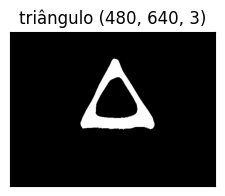

In [8]:
plt.figure(figsize=(3,2))

__ = np.zeros(shape=(480,640,3)).astype(np.uint8)

__[:,:,0] = _
__[:,:,1] = _
__[:,:,2] = _

triangulo = 255 - __

plt.imshow(triangulo)
plt.title(f'triângulo {triangulo.shape}')
plt.xticks([])
plt.yticks([])

plt.show()

# 2) Momentos invariantes

In [9]:
!ls | grep png

disco.png
elipse.png
paralelogramo.png
quadrado.png
trapezio.png
triangulo.png
triangulo2.png
trianguloRetangulo.png


In [10]:
hip = 'disco.png elipse.png paralelogramo.png quadrado.png trapezio.png triangulo.png triangulo2.png trianguloRetangulo.png'.split()
hip = [(h.split('.')[0], cv2.imread(h)) for h in hip]
len(hip)

8

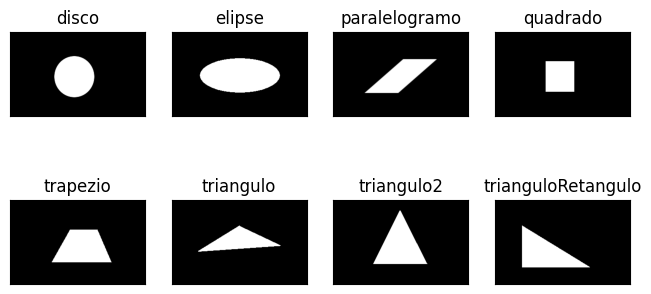

In [11]:
plt.figure(figsize=(8,4))

i = 1
for h in hip:
    plt.subplot(2,4,i)
    plt.title(h[0])
    plt.imshow(h[-1])
    plt.xticks([])
    plt.yticks([])
    i += 1

plt.show()

Number of Contours detected: 2
Moments of first contour:
{'m00': 27736.5, 'm10': 9171469.333333332, 'm01': 6204168.666666666, 'm20': 3102568126.9166665, 'm11': 2055337550.875, 'm02': 1464124133.5833333, 'm30': 1072468700211.3, 'm21': 698488845331.15, 'm12': 485718844523.18335, 'm03': 359392075212.7, 'mu20': 69890978.31198502, 'mu11': 3840690.5948319435, 'mu02': 76360398.27251768, 'mu30': 339399141.45654297, 'mu21': 1958803284.254675, 'mu12': -132873460.21084213, 'mu03': -2267782893.451782, 'nu20': 0.09084850904991464, 'nu11': 0.004992361284527596, 'nu02': 0.09925785131449937, 'nu30': 0.0026489977856322317, 'nu21': 0.015288387413744135, 'nu12': -0.0010370724579834606, 'nu03': -0.01769996187164078}


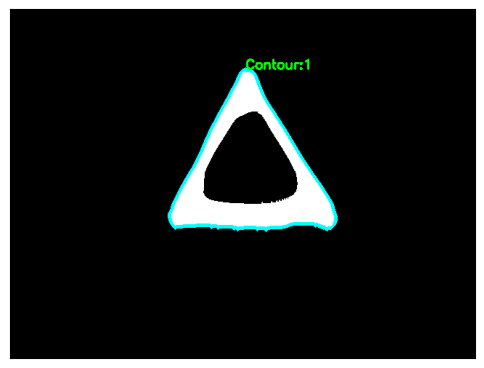

In [12]:
def teste(): 
    gray = cv2.cvtColor(triangulo, cv2.COLOR_BGR2GRAY)
    
    # apply thresholding on gray image
    ret,thresh = cv2.threshold(gray,150,255,0)
    
    # Find the contours in the image
    contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print("Number of Contours detected:",len(contours))
    
    # Find the moments of first contour
    cnt = contours[0]
    M = cv2.moments(cnt)
    
    # Draw the contour
    cv2.drawContours(triangulo, [cnt], -1, (0,255,255), 3)
    x1, y1 = cnt[0,0]
    cv2.putText(triangulo, 'Contour:1', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
    # print the moments of the first contour
    print(f'Moments of first contour:\n{M}')
    
    plt.figure(figsize=(6,8))
    plt.imshow(triangulo)
    plt.xticks([])
    plt.yticks([])
    plt.show()

teste()

In [13]:
def calcular_momentos_invariantes(imagem):
    # Carregar a imagem e converter para escala de cinza
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    # Calcular os momentos invariantes de Hu
    momentos = cv2.HuMoments(cv2.moments(imagem)).flatten()
    return momentos

def comparar_momentos_invariantes(momentos1, momentos2, limiar=1e-10):
    # Calcular a diferença absoluta entre os momentos invariantes
    diferenca_absoluta = np.abs(momentos1 - momentos2)
    # Verificar se a diferença absoluta é menor que o limiar
    similaridade = np.all(diferenca_absoluta < limiar)
    return similaridade

def exibir_imagens_e_resultado(imagem1, imagem2, momentos1, momentos2, similaridade):
    # Carregar as imagens
    imagem1 = cv2.cvtColor(imagem1, cv2.COLOR_BGR2GRAY)
    imagem2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)
    # Exibir as imagens
    plt.subplot(121), plt.imshow(cv2.cvtColor(imagem1, cv2.COLOR_BGR2RGB)), plt.title('Imagem 1')
    plt.subplot(122), plt.imshow(cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB)), plt.title('Imagem 2')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    # Exibir os momentos invariantes e a similaridade
    print(f'Momentos Invariantes da Imagem 1: {momentos1}')
    print(f'Momentos Invariantes da Imagem 2: {momentos2}')
    print(f'Similaridade entre as imagens: {similaridade}')

In [14]:
def run(i1, i2):
    # Calcular momentos invariantes para cada imagem
    momentos_imagem1 = calcular_momentos_invariantes(i1)
    momentos_imagem2 = calcular_momentos_invariantes(i2)
    # Comparar os momentos invariantes
    similaridade = comparar_momentos_invariantes(momentos_imagem1, momentos_imagem2)
    # Exibir as imagens e os resultados
    exibir_imagens_e_resultado(i1, i2, momentos_imagem1, momentos_imagem2, similaridade)

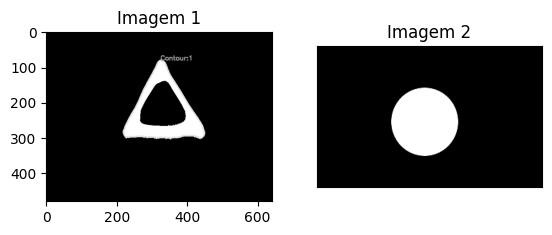

Momentos Invariantes da Imagem 1: [ 1.76957396e-03  2.64914591e-08  2.90774934e-09  1.29156478e-10
  7.60914682e-20  1.79966352e-14 -2.17913856e-20]
Momentos Invariantes da Imagem 2: [6.24334232e-04 1.69698846e-10 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Similaridade entre as imagens: False


In [15]:
run(triangulo, hip[0][-1])

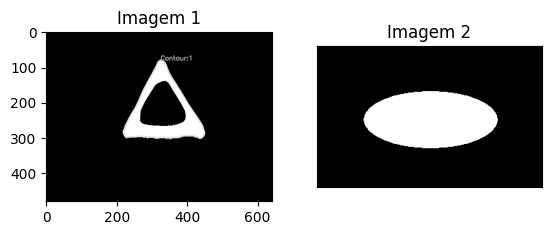

Momentos Invariantes da Imagem 1: [ 1.76957396e-03  2.64914591e-08  2.90774934e-09  1.29156478e-10
  7.60914682e-20  1.79966352e-14 -2.17913856e-20]
Momentos Invariantes da Imagem 2: [8.64259095e-04 3.57392059e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Similaridade entre as imagens: False


In [16]:
run(triangulo, hip[1][-1])

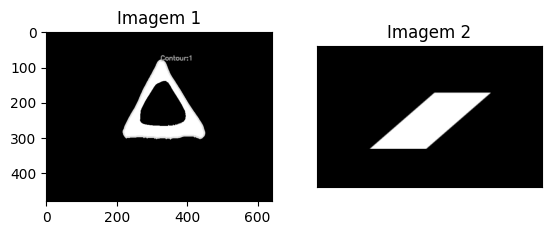

Momentos Invariantes da Imagem 1: [ 1.76957396e-03  2.64914591e-08  2.90774934e-09  1.29156478e-10
  7.60914682e-20  1.79966352e-14 -2.17913856e-20]
Momentos Invariantes da Imagem 2: [ 1.08428072e-03  7.48106947e-07  3.40761852e-17  2.35776707e-17
  6.67865022e-34  1.94406223e-20 -2.43361464e-35]
Similaridade entre as imagens: False


In [17]:
run(triangulo, hip[2][-1])

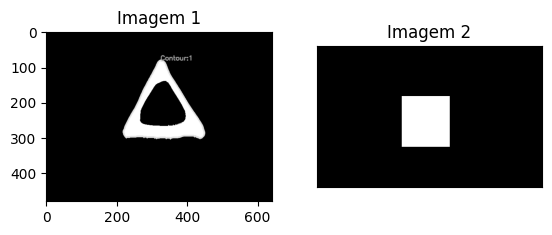

Momentos Invariantes da Imagem 1: [ 1.76957396e-03  2.64914591e-08  2.90774934e-09  1.29156478e-10
  7.60914682e-20  1.79966352e-14 -2.17913856e-20]
Momentos Invariantes da Imagem 2: [6.54529241e-04 1.39717364e-09 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Similaridade entre as imagens: False


In [18]:
run(triangulo, hip[3][-1])

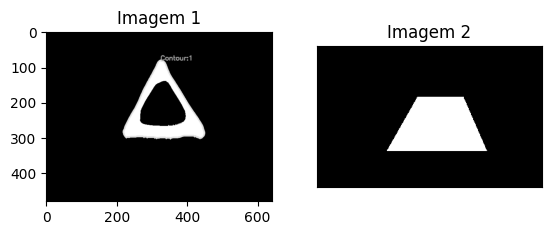

Momentos Invariantes da Imagem 1: [ 1.76957396e-03  2.64914591e-08  2.90774934e-09  1.29156478e-10
  7.60914682e-20  1.79966352e-14 -2.17913856e-20]
Momentos Invariantes da Imagem 2: [ 7.33409560e-04  7.39409752e-08  9.04831782e-11  4.10066879e-12
 -6.11852356e-23 -9.05914349e-16  4.99560836e-23]
Similaridade entre as imagens: False


In [19]:
run(triangulo, hip[4][-1])

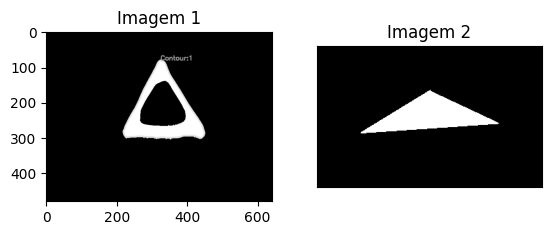

Momentos Invariantes da Imagem 1: [ 1.76957396e-03  2.64914591e-08  2.90774934e-09  1.29156478e-10
  7.60914682e-20  1.79966352e-14 -2.17913856e-20]
Momentos Invariantes da Imagem 2: [ 1.32877494e-03  1.19652009e-06  5.28197986e-10  4.64829455e-11
 -6.24617865e-21 -4.64472162e-14  3.74623925e-21]
Similaridade entre as imagens: False


In [20]:
run(triangulo, hip[5][-1])

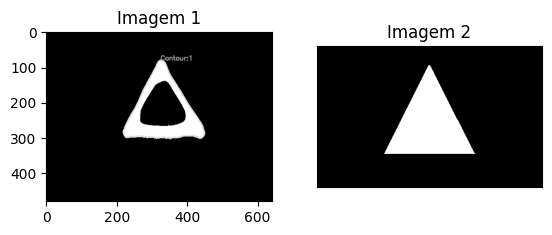

Momentos Invariantes da Imagem 1: [ 1.76957396e-03  2.64914591e-08  2.90774934e-09  1.29156478e-10
  7.60914682e-20  1.79966352e-14 -2.17913856e-20]
Momentos Invariantes da Imagem 2: [ 7.62288901e-04  1.08543041e-08  2.80524602e-10  1.51932101e-12
  3.12667739e-23  1.57777593e-16 -2.49354753e-24]
Similaridade entre as imagens: False


In [21]:
run(triangulo, hip[6][-1])

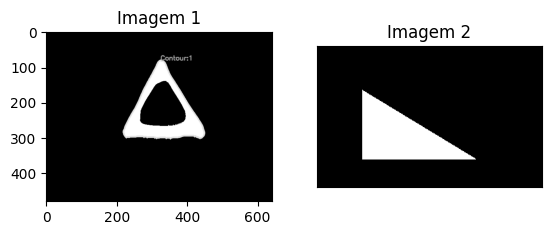

Momentos Invariantes da Imagem 1: [ 1.76957396e-03  2.64914591e-08  2.90774934e-09  1.29156478e-10
  7.60914682e-20  1.79966352e-14 -2.17913856e-20]
Momentos Invariantes da Imagem 2: [9.81333948e-04 3.93699880e-07 4.35810612e-10 7.85825270e-11
 1.36975911e-20 4.13763206e-14 4.88458271e-21]
Similaridade entre as imagens: False


In [22]:
run(triangulo, hip[7][-1])